In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('AirPassengers.csv')

In [2]:
data['Month'] = pd.to_datetime(data['Month'])
data['Passengers'] = data['#Passengers']

In [3]:
data = data.set_index(data['Month'])

In [4]:
data = data.drop(['Month','#Passengers'], axis = 1)

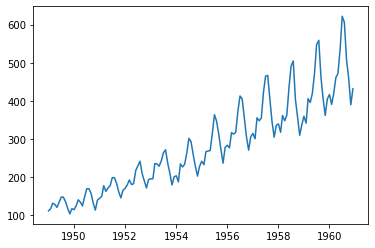

In [5]:
plt.plot(data)

# rolling statistics

In [7]:
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


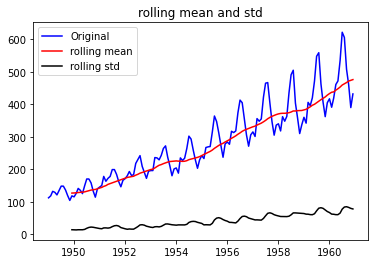

In [44]:
rolmean = data.rolling(window = 12).mean()
rolstd = data.rolling(window = 12).std()
orginal = plt.plot(data, color = 'blue', label = 'Original')
mean = plt.plot(rolmean,color = 'red', label = 'rolling mean')
std = plt.plot(rolstd, color = 'black', label = 'rolling std')
plt.legend(loc = 'best')
plt.title('rolling mean and std')
plt.show(block = False)

# DICKEY FULLER TEST

In [57]:
from statsmodels.tsa.stattools import adfuller
dtest = adfuller(data['Passengers'] )
dout = pd.Series(dtest[0:3], index = ['test_statistics','p-value','lags used'])
dout

test_statistics     0.815369
p-value             0.991880
lags used          13.000000
dtype: float64

# estimating trend

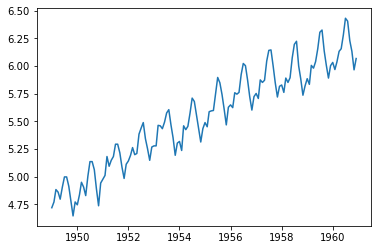

In [62]:
estimating_trend = np.log(data)
plt.plot(estimating_trend)

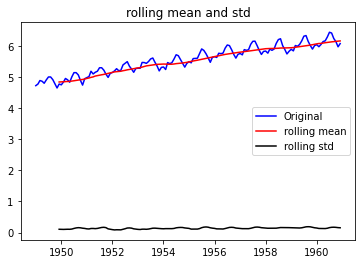

In [63]:
rolmean = estimating_trend.rolling(window = 12).mean()
rolstd = estimating_trend.rolling(window = 12).std()
orginal = plt.plot(estimating_trend, color = 'blue', label = 'Original')
mean = plt.plot(rolmean,color = 'red', label = 'rolling mean')
std = plt.plot(rolstd, color = 'black', label = 'rolling std')
plt.legend(loc = 'best')
plt.title('rolling mean and std')
plt.show(block = False)